# NLTK & processing a text file

Download & open this file in Google Colabs! 

https://colab.research.google.com/

This is a tutorial & introduction to NLTK, Natural Language Toolkit

## Using NLTK

* NLTK ([Natural Language Toolkit](http://www.nltk.org/)) is an external library; you must import it first using an import statement. 

In [ ]:
import nltk

* Let's first download some data files. If we know the package or data files we want to import, we can pass that as an argument to the `nltk.download()` function. 

If not, we can interactively browse the files we want to download:

In [ ]:
nltk.download()

Let's download the `popular` files, which will give us some nice things to work with.

Let's use the function below to tokenize a sentence that we choose:



In [ ]:
# Tokenizing function: turns a text (a single string) into a list of word & symbol tokens
greet = ""
nltk.word_tokenize(greet)

We can also look at just what happens when we use the word_tokenize module that's built in to NLTK by calling the `help()` function on it:

In [ ]:
help(nltk.word_tokenize)

In [ ]:
sentence = ""
nltk.word_tokenize(sentence)

`nltk.FreqDist()` is is another useful NLTK function. 

It builds a frequency count dictionary from a list. 

Let's start with just a sentence, so we can see a manageable output:

In [ ]:

rose = 'A rose is a rose is a rose is a rose.'
tokens = nltk.word_tokenize(rose.lower())
print(tokens)
print("Length of sentence: ", len(tokens))

In [ ]:
freq = nltk.FreqDist(tokens)
freq

We can also use the most_common() method to look at the most common elements in our frequency distribution. 

This method takes an optional argument -- the default (with no argument) is to display all. But you can specify how many you'd like to see by putting in a number here:

`freq.most_common(2)`

In [ ]:
#help(nltk.FreqDist.most_common)
freq.most_common()



We can also just look at a single token's frequency by looking up that key in our frequency dictionary (ie: enclosing that token in square brackets):

In [ ]:
freq['rose']

Taking the length of the frequency table will get us the number of types!

In [ ]:
print('the number of types is : ', len(freq))

You can also of course get the list of keys (aka, our tokens) in this dictionary.

In [ ]:
freq.keys()

## Processing a single text file

### Reading in a text file
* `open(filename).read()` opens a text file and reads in the content as a *single continuous string*. 

We will need to upload the texts we want to be working with into this colab. I've included some in our Week 7 repository (3 chapters of Moby Dick)



In [ ]:
myfile = '/content/three-chaps-mobyDick.txt'  
mobyDick = open(myfile).read()
print(mobyDick)

Let's make sure we've got things loaded properly...

Getting the length will tell us how many characters we have total (since this is read in as a string):

In [ ]:
len(mobyDick)     # Number of characters in text

We know the word 'harpooneer' occurs in this text, let's make sure we can find it:

In [ ]:
'harpooneer' in mobyDick  # phrase as a substring. try "harpooner"

### Tokenize text, compile frequency count

NLTK allows us to do a lot of the manual work that we did last week of compiling a dictionary of our input text and their frequency counts in a few quick steps:

In [ ]:
# Turn off/on pretty printing (prints too many lines)
%pprint    

In [ ]:
# Lowercase & Tokenize text
nltk.word_tokenize(mobyDick.lower())

In [ ]:
mtokens = nltk.word_tokenize(mobyDick.lower())
len(mtokens)     # Number of words in text

In [ ]:
# Build a dictionary of frequency count
mfreq = nltk.FreqDist(mtokens)
mfreq['the']

In [ ]:
'harpooneer' in mfreq

Once we have the dictionary, we can get the counts of unique words in our text (aka, types):

In [ ]:
len(mfreq)      # Number of unique words in text

Take a look at the 30 most common words:

In [ ]:
mfreq.most_common(30)     # 30 most common words

### What else can we do?

If we use dir() on this dictionary object that we've created that holds the Moby Dick keys and frequencies, we'll get a list of things we can do. We have to scroll past some other things, but here at the end, we can see a bunch of methods and functions that we can call on this dictionary of data:

In [119]:
# dir() prints out all functions defined on the type of object. 
dir(mfreq)

['B', 'N', 'Nr', '_N', '__add__', '__and__', '__class__', '__contains__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__iand__', '__init__', '__init_subclass__', '__ior__', '__isub__', '__iter__', '__le__', '__len__', '__lt__', '__missing__', '__module__', '__ne__', '__neg__', '__new__', '__or__', '__pos__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__unicode__', '__weakref__', '_cumulative_frequencies', '_keep_positive', 'clear', 'copy', 'elements', 'freq', 'fromkeys', 'get', 'hapaxes', 'items', 'keys', 'max', 'most_common', 'pformat', 'plot', 'pop', 'popitem', 'pprint', 'r_Nr', 'setdefault', 'subtract', 'tabulate', 'unicode_repr', 'update', 'values']

In [120]:
# Hmm. Wonder what .freq does... let's find out. 
help(mfreq.freq)

Help on method freq in module nltk.probability:

freq(sample) method of nltk.probability.FreqDist instance
    Return the frequency of a given sample.  The frequency of a
    sample is defined as the count of that sample divided by the
    total number of sample outcomes that have been recorded by
    this FreqDist.  The count of a sample is defined as the
    number of times that sample outcome was recorded by this
    FreqDist.  Frequencies are always real numbers in the range
    [0, 1].
    
    :param sample: the sample whose frequency
           should be returned.
    :type sample: any
    :rtype: float



In [121]:
mfreq.freq('the')

0.04628797411468632

Let's also look at `plot` , and hapax legomena

In [122]:
help(mfreq.plot)

Help on method plot in module nltk.probability:

plot(*args, **kwargs) method of nltk.probability.FreqDist instance
    Plot samples from the frequency distribution
    displaying the most frequent sample first.  If an integer
    parameter is supplied, stop after this many samples have been
    plotted.  For a cumulative plot, specify cumulative=True.
    (Requires Matplotlib to be installed.)
    
    :param title: The title for the graph
    :type title: str
    :param cumulative: A flag to specify whether the plot is cumulative (default = False)
    :type title: bool



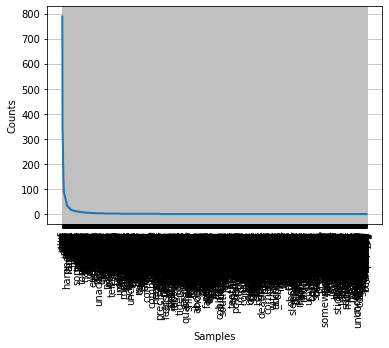

In [123]:
mfreq.plot()

In [124]:
len(mfreq.hapaxes())

1728

### Average sentence length, frequency of long words

This is another common text analysis method that we want to look at.

First, let's count the number of sentences. We'll do this crudely, and assume that all sentences end with only 3 punctuation elements:

In [ ]:
sentcount = mfreq['.'] + mfreq['?'] + mfreq['!']  # Assuming every sentence ends with ., ! or 
print(sentcount)

In [ ]:
# Tokens include symbols and punctuation. First 50 tokens:
mtokens[:50]

We want to make sure that we're not counting punctuation in our sentence-length counts, so let's create a new list where we only include words if they're alpha-numeric:

In [ ]:
mtokens_nosym = [token for token in mtokens if token.isalnum()]    # A list comprehensoion! Make sure they are alpha-numeric tokens only
len(mtokens_nosym)

Is this ok?

In [ ]:
# Try "n't", "4th", "."
".".isalnum()

In [ ]:
# First 50 tokens, alpha-numeric tokens only: 
mtokens_nosym[:50]

Divide the number of word tokens by the count of how many sentences we have to get our average sentence length

In [ ]:
len(mtokens_nosym)/sentcount     # Average sentence length in number of words

Get a list of all the really long words, which tend to be less frequent. (They also tend to be the words that can help determine authorship!)

In [ ]:
[word for word in mfreq if len(word) >= 13]       # all 13+ character words

In [ ]:
long = [word for word in mfreq if len(word) >= 13] 
# sort long alphabetically using sorted()
for word in sorted(long) :
    print(word, len(word), mfreq[word])               # long words tend to be less frequent

# n-grams & NLTK

NLTK makes it easy to look at n-gram frequencies for our texts, too!

In [114]:
import collections
from nltk.util import ngrams

In [134]:
mobyBigrams = ngrams(mtokens_nosym, 2)

Get the frequency of each bigram in our text

In [129]:
mobyBigramsFreq = collections.Counter(mobyBigrams)

Look at the top 20:

In [135]:
mobyBigramsFreq.most_common(30)

for entry in mobyBigramsFreq.most_common(30):
  print(entry)

(('it', 'was', 'a'), 7)
(('go', 'to', 'sea'), 6)
(('a', 'sort', 'of'), 6)
(('to', 'sea', 'as'), 5)
(('sea', 'as', 'a'), 5)
(('out', 'of', 'the'), 5)
(('in', 'the', 'middle'), 5)
(('the', 'middle', 'of'), 5)
(('of', 'the', 'room'), 5)
(('landlord', 'said', 'i'), 5)
(('as', 'a', 'passenger'), 4)
(('there', 'was', 'a'), 4)
(('sleep', 'two', 'in'), 4)
(('two', 'in', 'a'), 4)
(('in', 'a', 'bed'), 4)
(('said', 'the', 'landlord'), 4)
(('i', 'began', 'to'), 4)
(('part', 'of', 'the'), 3)
(('it', 'is', 'a'), 3)
(('why', 'did', 'the'), 3)
(('go', 'as', 'a'), 3)
(('as', 'a', 'sailor'), 3)
(('in', 'the', 'world'), 3)
(('that', 'it', 'was'), 3)
(('of', 'the', 'whale'), 3)
(('no', 'idea', 'of'), 3)
(('the', 'sign', 'of'), 3)
(('sign', 'of', 'the'), 3)
(('here', 'and', 'there'), 3)
(('as', 'if', 'it'), 3)


# Stemming & Lemmatization

In [ ]:
# import these modules
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

Let's import the Porter Stemmer

In [ ]:
ps = PorterStemmer()
 
# choose some words to be stemmed
words = ["linguistics", "linguist", "linguistically", "is", "was", "are", "were", "am", "be", "being"]
 
for w in words:
    print(w, " : ", ps.stem(w))

Let's also take a look at the difference here in terms of lemmatizing

In [ ]:
from nltk.stem import WordNetLemmatizer
 
lemmatizer = WordNetLemmatizer()


In [ ]:
for word in words:
  print(word, " : ", lemmatizer.lemmatize(word)) 

# a denotes adjective in "pos"
#print("better :", lemmatizer.lemmatize("better", pos ="a"))

So this is a little better, but not a ton -- let's take a look at the lemmatize() function to see what we can do with that:


Reference: https://www.geeksforgeeks.org/python-lemmatization-with-nltk/

In [ ]:
help(lemmatizer.lemmatize)

In [ ]:
wordsDict = {"linguistics": "n", "linguist": "n", "linguistically": "a", "is": "v", "was": "v", "are": "v", "were": "v", "am": "v", "be": "v", "being": "v"}

for key in wordsDict:
  print(key, " : ", lemmatizer.lemmatize(key, pos = wordsDict[key])) 